In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def read_cycling(file_to_read):
    """
    Function to import an autolb generated cell-cycling text file
    """
    header_line = "Time (s)\tWE(1).Potential (V)"
    blocks = []
    current_block = []

    with open(file_to_read, "r", encoding="utf-8-sig") as f:  # utf-8-sig removes BOM mark if present
        for line in f:
            line = line.strip()
            if not line:
                continue
            if line.startswith("Time (s)"):  # New block
                if current_block:
                    data = np.loadtxt(current_block)
                    blocks.append(data)
                    current_block = []
            else:
                current_block.append(line)

    # Don’t forget to process the last block
    if current_block:
        data = np.loadtxt(current_block)
        blocks.append(data)

    return blocks

In [3]:
test_file = '/Users/tiagopaiva/Library/CloudStorage/OneDrive-UniversidadedeLisboa/CORKCAP_2022.05187.PTDC/Data/AutoLabAut84318/Data/T59_8_cycling.txt'

In [4]:
data = read_cycling(test_file)
discharge_curves = data[1::2]

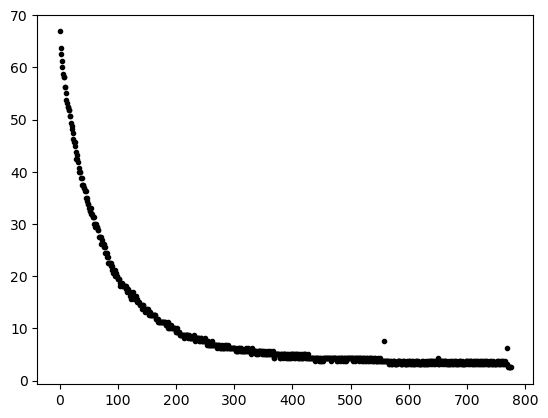

In [5]:

results = np.array([(block[-1, 0] - block[0, 0]) / 0.8 for block in discharge_curves])
plt.plot(results, color = 'black', marker = 'o', linestyle = '', markersize = 3)